- Get dummies for func non func
- Target encode each variable with a function provided by Kristian


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [78]:
df_p = pd.read_csv('pumps.csv', index_col = 0)
df_py = pd.read_csv('pumps_y.csv', index_col = 0)

In [79]:
df_p.shape, df_py.shape

((59400, 39), (59400, 1))

In [80]:
#Merging pumps_y as a new column on pumps
df_p['status_group'] = df_py['status_group']

In [81]:
df_p.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [82]:
#Missing Values
df_p.isnull().sum() # number of missing values

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Remove scheme_name and date_recorded because scheme_name is mostly empty and date_recorded is something that cant be correlated

In [83]:
df_p = df_p.drop(['scheme_name', 'date_recorded'], axis=1)

In [84]:
df_p.head(3)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [85]:
#Split the dataframe into numeric and categorical

In [86]:
#Divide df into numeric and categorical

df_num = df_p[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']]

In [87]:
#Categorical df

df_cat = df_p[['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']]

In [88]:
#Check the NaNs - num
df_num.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [1]:
#Check the NaNs - cat AND the unique value counts
voids = df_cat.isnull().sum(), uniqueValues = df_cat_fillna.nunique()
print(voids, uniqueValues)

SyntaxError: can't assign to function call (<ipython-input-1-8f56fca7bcc7>, line 2)

In [90]:
#Fill all NaNs with 'no data'
df_cat_fillna = df_cat.fillna('not available')

In [91]:
#Recheck NaNs
df_cat_fillna.isnull().sum()

funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [92]:
#Count the unique categorical variables
uniqueValues = df_cat_fillna.nunique()
print(uniqueValues)

funder                    1898
installer                 2146
wpt_name                 37400
basin                        9
subvillage               19288
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management           13
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64


Based on above, select: (cat var numbers < 10 and not duplicate ie quantity & quantity group)
- basin
- public meeting
- permit
- extraction_type_class
- management_group
- payment
- payment_type (one of them needs to be dropped)
- water_quality
- quality_group (keep this if it is like above)
- quantity
- quantity_group
- source_class
- waterpoint_type_group


train against status_group

In [93]:
df_cat_fillna['payment'].unique()

array(['pay annually', 'never pay', 'pay per bucket', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [94]:
df_cat_fillna['payment_type'].unique()

array(['annually', 'never pay', 'per bucket', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

In [95]:
df_cat_fillna['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [96]:
df_cat_fillna['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [97]:
df_cat_fillna['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [98]:
df_cat_fillna['quantity_group'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

Based on above, select: (cat var numbers < 10 and not duplicate ie quantity & quantity group)
- basin
- permit
- extraction_type_class
- management_group
- payment_type 
- quality_group (keep this if it is like above)
- quantity_group
- source_class
- waterpoint_type_group


train against status_group

In [99]:
#Dummify the target
dummy_target_var = pd.get_dummies(df_cat_fillna['status_group'])

In [100]:
#Check the dummy df and NORMALLY remove the redundant variable. I will not here...
dummy_target_var.head()

,functional,functional needs repair,non functional
id,,,
69572,1,0,0
8776,1,0,0
34310,1,0,0
67743,0,0,1
19728,1,0,0


In [101]:
#Concat original cat df and dummified target

df_cat_fillna_dummy_target = pd.concat([df_cat_fillna, dummy_target_var], axis = 1)
df_cat_fillna_dummy_target.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,functional,functional needs repair,non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1,0,0
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,0
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,1,0,0


In [102]:
#Target Encoding

column_list_to_target_encode = ['basin','permit', 'extraction_type_class', 'management_group', 
                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
                                                       'waterpoint_type_group']
for column in column_list_to_target_encode:
    target_means = df_cat_fillna_dummy_target.groupby(column).mean()
    df_cat_fillna_dummy_target[f'{column}_func'] = df_cat_fillna_dummy_target[column].replace(target_means['functional'])
    df_cat_fillna_dummy_target[f'{column}_nonfunc'] = df_cat_fillna_dummy_target[column].replace(target_means['non functional'])
    df_cat_fillna_dummy_target[f'{column}_nr'] = df_cat_fillna_dummy_target[column].replace(target_means['functional needs repair'])
#df['cat_nonf'] = df['cat'].replace(target_means['nonf'])
df_cat_fillna_dummy_target.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
67743,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,...,0.076823,0.025136,0.968940,0.005924,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
19728,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,...,0.076823,0.574074,0.323210,0.102716,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986


In [104]:
#Check the shape
df_cat_fillna_dummy_target.shape

(59400, 59)

In [105]:
#Check the column string to make sure that everything is there
df_cat_fillna_dummy_target.columns
#['basin','permit', 'extraction_type_class', 'management_group', 
#                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
#                                                       'waterpoint_type_group']

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'functional', 'functional needs repair', 'non functional', 'basin_func',
       'basin_nonfunc', 'basin_nr', 'permit_func', 'permit_nonfunc',
       'permit_nr', 'extraction_type_class_func',
       'extraction_type_class_nonfunc', 'extraction_type_class_nr',
       'management_group_func', 'management_group_nonfunc',
       'management_group_nr', 'payment_type_func', 'payment_type_nonfunc',
       'payment_type_nr', 'quality_group_func', 'quality_group_nonfunc',
       'quality_group_nr', 'quanti

In [127]:
df_cat_fillna_dummy_target.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
67743,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,...,0.076823,0.025136,0.968940,0.005924,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
19728,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,...,0.076823,0.574074,0.323210,0.102716,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986


In [132]:
#Check heads and tails before merging
df_num.head(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009


In [133]:
df_num.tail(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
31282,0.0,0,35.861315,-6.378573,0,1,4,0,0
26348,0.0,191,38.104048,-6.747464,0,5,2,150,2002


In [106]:
df_cat_fillna_dummy_target.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986


In [107]:
df_cat_fillna_dummy_target.tail(10)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
13677,Rudep,DWE,Kwa Mzee Atanas,Lake Tanganyika,Kitonto,Rukwa,Sumbawanga Rural,Mkowe,True,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.542320,0.397825,0.059855,0.617852,0.323307,0.058840
44885,Government Of Tanzania,Government,Kwa,Pangani,Maore Kati,Kilimanjaro,Same,Maore,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
40607,Government Of Tanzania,Government,Benard Charles,Lake Rukwa,Mbuyuni A,Mbeya,Chunya,Mbuyuni,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
48348,Private,Private,Kwa Peter,Internal,Masanga,Tabora,Igunga,Igunga,False,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.545168,0.336960,0.117872,0.131661,0.822414,0.045925
11164,World Bank,ML appro,Chimeredya,Wami / Ruvu,Komstari,Morogoro,Mvomero,Diongoya,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
60739,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
27263,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
37057,not available,not available,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,0.059908,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.617852,0.323307,0.058840
31282,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,...,0.076823,0.523234,0.380924,0.095842,0.542320,0.397825,0.059855,0.617852,0.323307,0.058840


In [108]:
#Merge dummified_target_encoded_cat and numeric dataframes
num_dumm_cat = pd.concat([df_num, df_cat_fillna_dummy_target], axis = 1)

In [120]:
num_dumm_cat.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,funder,...,quality_group_nr,quantity_group_func,quantity_group_nonfunc,quantity_group_nr,source_class_func,source_class_nonfunc,source_class_nr,waterpoint_type_group_func,waterpoint_type_group_nonfunc,waterpoint_type_group_nr
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,Roman,...,0.076823,0.652323,0.275357,0.072320,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,Grumeti,...,0.076823,0.523234,0.380924,0.095842,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,Lottery Club,...,0.076823,0.652323,0.275357,0.072320,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,Unicef,...,0.076823,0.025136,0.968940,0.005924,0.542320,0.397825,0.059855,0.576491,0.339523,0.083986
19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,Action In A,...,0.076823,0.574074,0.323210,0.102716,0.545168,0.336960,0.117872,0.576491,0.339523,0.083986


In [126]:
num_dumm_cat['quality_group_nr'].head()

id
69572    0.076823
8776     0.076823
34310    0.076823
67743    0.076823
19728    0.076823
Name: quality_group_nr, dtype: float64

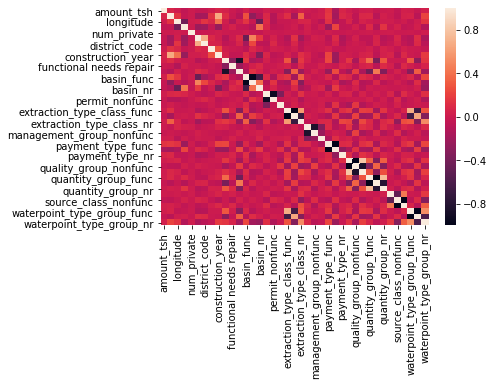

In [110]:
#Corr heatmap
sns.heatmap(num_dumm_cat.corr())

In [111]:
num_dumm_cat.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year',
       'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'functional', 'functional needs repair', 'non functional', 'basin_func',
       'basin_nonfunc', 'basin_nr', 'permit_func', 'permit_nonfunc',
       'permit_nr', 'extraction_type_class_func',
       'extraction_type_class_nonfunc', 'extraction_type_class_nr',
       'management_group_func', 'management_group_nonfunc',
       'management_group_nr', 'pa

In [119]:
# List comprehension for picking training data sets

column_list_to_target_encode = ['basin','permit', 'extraction_type_class', 'management_group', 
                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
                                                       'waterpoint_type_group']

num_list =['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
           'region_code', 'district_code', 'population', 'construction_year']

#for functionals
s_func = '_func'
s_nonfunc = '_nonfunc'
s_nr = '_nr'
func_list = [x + s_func for x in column_list_to_target_encode]
nonfunc_list = [x + s_nonfunc for x in column_list_to_target_encode]
repair_list = [x + s_nr for x in column_list_to_target_encode]
func_list.extend(num_list)
nonfunc_list.extend(num_list)
repair_list.extend(num_list)
print(func_list, nonfunc_list)

['basin_func', 'permit_func', 'extraction_type_class_func', 'management_group_func', 'payment_type_func', 'quality_group_func', 'quantity_group_func', 'source_class_func', 'waterpoint_type_group_func', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year'] ['basin_nonfunc', 'permit_nonfunc', 'extraction_type_class_nonfunc', 'management_group_nonfunc', 'payment_type_nonfunc', 'quality_group_nonfunc', 'quantity_group_nonfunc', 'source_class_nonfunc', 'waterpoint_type_group_nonfunc', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


In [122]:
#Define data and train sets
X_func = num_dumm_cat.loc[:,func_list]
X_nonfunc = num_dumm_cat.loc[:,nonfunc_list]
X_repair = num_dumm_cat.loc[:,repair_list]
y_func = num_dumm_cat.loc[:, 'functional']
y_nonfunc = num_dumm_cat.loc[:, 'non functional']
y_repair = num_dumm_cat.loc[:, 'functional needs repair']

In [123]:
#Check shapes
X_func.shape, y_func.shape

((59400, 18), (59400,))

In [124]:
m_f = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_nf = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_r = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)

m_f.fit(X_func, y_func) # find the best model parameters for this data functional pumps
m_nf.fit(X_nonfunc, y_nonfunc) # best model params for non_functional
m_r.fit(X_repair, y_repair) # best model params for repair needing pumps

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [125]:
print('Score for functional pump prediction is', m_f.score(X_func,y_func)) # calculates the accuracy (% of correct points) for non_func
print('Score for functional but repair needing pump prediction is', m_r.score(X_repair,y_repair))
print('Score for nonfunctional pump prediction is', m_nf.score(X_nonfunc,y_nonfunc))

Score for functional pump prediction is 0.6866835016835017
Score for functional but repair needing pump prediction is 0.9273232323232323
Score for nonfunctional pump prediction is 0.6563804713804714


In [208]:
#Check correlation matrix to see if there are more insights - OBSERVE I printed it small
num_dumm_cat.corr().head(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_Internal,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
amount_tsh,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915,-0.012888,...,-0.005682,-0.004586,0.039472,-0.001150,-0.019800,-0.005608,-0.030951,0.052427,-0.004724,-0.051170
gps_height,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727,0.121803,...,-0.029057,0.025246,0.242547,-0.005910,-0.203826,-0.001109,-0.089200,0.112990,-0.016435,-0.106942
longitude,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732,0.051586,...,0.012377,0.016049,0.199965,0.005776,-0.212747,-0.042011,0.007719,0.027332,-0.120864,0.036516


In [163]:
num_dumm_cat.index

Int64Index([69572,  8776, 34310, 67743, 19728,  9944, 19816, 54551, 53934,
            46144,
            ...
            13677, 44885, 40607, 48348, 11164, 60739, 27263, 37057, 31282,
            26348],
           dtype='int64', name='id', length=59400)

In [227]:
def model_prob(i):
    a = m.predict_proba([num_dumm_cat.loc[i,'basin_Internal':'waterpoint_type_group_other']])
    b = m1.predict_proba([num_dumm_cat.loc[i,'basin_Internal':'waterpoint_type_group_other']])
    c = m2.predict_proba([num_dumm_cat.loc[i,'basin_Internal':'waterpoint_type_group_other']])

    print ("Probability is", a, b, c)


In [230]:
model_prob(44885)

Probability is [[0.66984553 0.33015447]] [[0.92907035 0.07092965]] [[0.42226063 0.57773937]]
